# ***ANÁLISE DE VENDAS APÓS INVESTIMENTO EM MARKETING EM DIFERENTES ÁREAS***

In [ ]:
import io
import requests
import pandas as pd  # MANIPULAR BASES DE DADOS
import seaborn as sns  # GRAPHICS GENERATION
from sklearn import metrics  # METHODS TO EVALUATE THE BEST AI TEST PERFORMANCE
import matplotlib.pyplot as plt  # GRAPHICS GENERATION
from IPython.display import display
from sklearn.linear_model import LinearRegression  # AI TRAINING TEST
from sklearn.ensemble import RandomForestRegressor  # AI TRAINING TEST
from sklearn.model_selection import train_test_split  # AI LIBRARY

In [ ]:
# IMPORT ARCHIVE AND UNDERSTAND
tabela_url = 'https://raw.githubusercontent.com/lucasoal/PythonWeek/master/aula3/advertising.csv?token=GHSAT0AAAAAABRTZYQSTYBYPTTJYHY65UWUYSDSCEA'
tabela_csv = requests.get(tabela_url).content
df = pd.read_csv(io.StringIO(tabela_csv.decode('utf-8')))
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


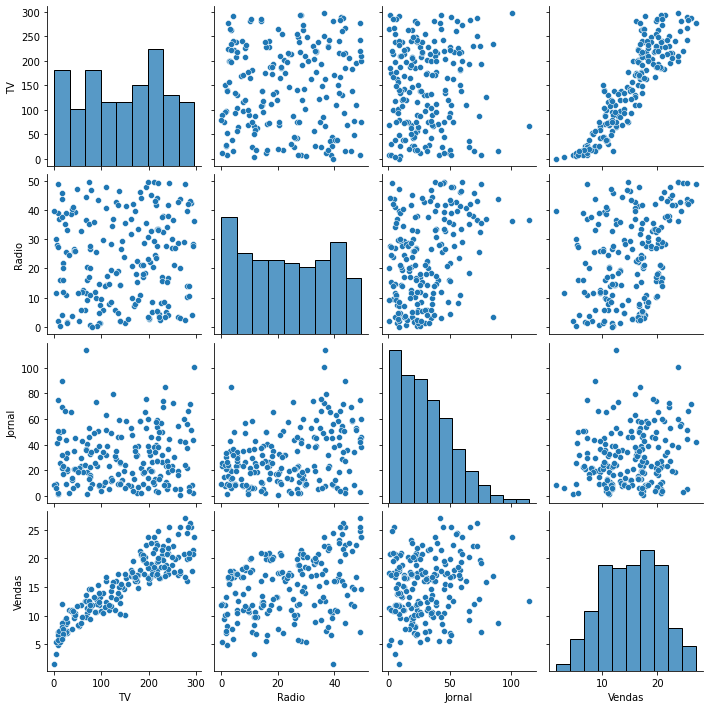

In [ ]:
# EXPLORATORY ANALYSIS
# SNS MAKES THE GRAPHIC ABOUT THE ARCHIVE
# PLT SHOW THE GRAPHIC
sns.pairplot(df)
plt.show()

In [ ]:
# MODELING + ALGORITHMS (AI IF NECESSARY)
# RETIRAR A COLUNA AXIS 1 VENDAS DA CONDICAO DE ANALISE
# ATRIBUIR A CONDIÇÃO DE VENDAS A VARIAVEL Y
x = df.drop("Vendas", axis=1)   # VALUES TO BE USED
y = df["Vendas"]                # VALUES TO BE CALCULATED

# SEPARATE TRAINING AND TEST VALUES
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

# CREATING AN IA
linear = LinearRegression()
randomforest = RandomForestRegressor()

# TRAINING THE IA
linear.fit(x_treino, y_treino)      # ATRIBUI OS ATRIBUTOS DE TREINO
randomforest.fit(x_treino, y_treino)    # ATRIBUI OS ATRIBUTOS DE TREINO

# AI TEST
# PERFORMANCE TESTING OF EACH LEARNING METHOD USED BY AI
teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

# COMPARE TESTS WITH RESULTS OBTAINED
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)

# COMPARE THE ERROR PERFORMANCE
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_random)

print(r2_linear, r2_random)
print(erro_linear, erro_random)

0.8909376482518793 0.9443330945756422
2.942072059776846 1.501673533333334


In [ ]:
# CREATING COMPARISON TABLE
tabela_comparacao = pd.DataFrame() # CREATE
tabela_comparacao["Vendas Reais"] = y_teste # ADD COLUMN 
tabela_comparacao["Previsao Random"] = teste_random # ADD COLUMN 
tabela_comparacao = tabela_comparacao.reset_index(drop=True) # ORGANIZE 

tabela_comparacao.head()

,Vendas Reais,Previsao Random
0,9.4,12.115
1,18.4,18.913
2,13.4,11.840
3,18.4,17.724
4,22.1,21.505


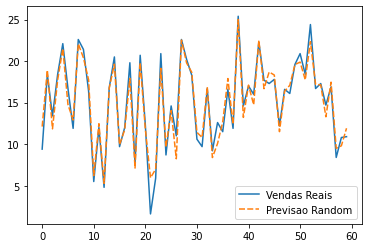

In [ ]:
sns.lineplot(data=tabela_comparacao)
plt.show()